# Gradient descent

## Theory

### Formulation of the problem

Let $f(x)$: $R^n ->R$. 

Our task is to find $\min\limits_{x \in R^n}(f(x))$.

We assume, that gradient of $f(x)$ exists.

### Algorithm

The main idea of the method is to make a minimization of the function in the direction of the steepest descent. This direction is $-\nabla f(x)$:
$$x_{k+1} = x_{k}-\lambda_{k} \nabla f(x_{k}),$$
where $\lambda_{k}$ is a step of the algorithm. This step can be choosen in three different ways:
* constant (in this case algorithm can diverge)
* fractional step
* steepest descent: $\lambda_{k} = argmin_{\lambda}f(x_{k}-\lambda \nabla f(x_{k}))$

### Stop criterion

* $||x_{k+1} - x_{k}|| \leq \varepsilon$
* $||f(x_{k+1}) - f(x_{k})|| \leq \varepsilon$


### Convergence of the algorithm with constant step

Theorem 1

Let $f(x)$ is differentiable and bounded below. Gradient $f(x)$ is Lipschitz function with constant $L$. And $\lambda \in [0; \frac{L}{2}]$, then gradient descent converges with any initial parametrs.

Theorem 2

Let $f(x)$ is differentiable and strictly convex with parametr $C$. Gradient $f(x)$ is Lipschitz function with constant $L$. And $\lambda \in [0; \frac{L}{2}]$, then gradient descent converges with any initial parametrs. Convergence rate is determined by the expression: $q = \frac{L-C}{L+C}$.


### Algorithm with fractional step

On every step next $\lambda_k$ determine using the next expression:
    $$f(x_k -\lambda_{k}f'(x_k)) \leq f(x_k) - \varepsilon \lambda_{k} ||f'(x_k)||^2$$

On the practice it works as follows: choose initial step $\lambda_{0}$ and some small constant $\delta$. On step $k$ set $\lambda_{k} = \lambda_{0}$. If expression above is satisfied, then $\lambda_{k} = \lambda_{0}$, else reduce $\lambda_{0}$ by $\delta$. Do it until expression above will not be satisfied.

### Algorithm with "steepest descent" step.

The idea of choosing step in this method is biased on next assumption:
From $x_k$ we will move in the direction of the fastest descent until we reach a minimum along it.
Direction of rhe fastest descent:
$$L = \{ x= x_k-\lambda f'(x_k) \}$$

Thereby, $\lambda_k = argmin_{\lambda}f(x_{k}-\lambda \nabla f(x_{k}))$. So at each step of the method, we must solve the problem of one-dimensional minimization.

### Practical advice

* constant: choose $\lambda \leq 0.01$ otherwise algorithm can diverge
* fractional step: $\varepsilon = 0.1$, $\delta = 0.75$, $\lambda_0 = 1$
* steepest descent: as a one-dimensional optimization method, you can use the golden ratio method

## Code examples

In [4]:
from scipy.misc import derivative
from matplotlib import pylab as plt
import numpy as np
from numpy import linalg as LA
from scipy.optimize import minimize
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

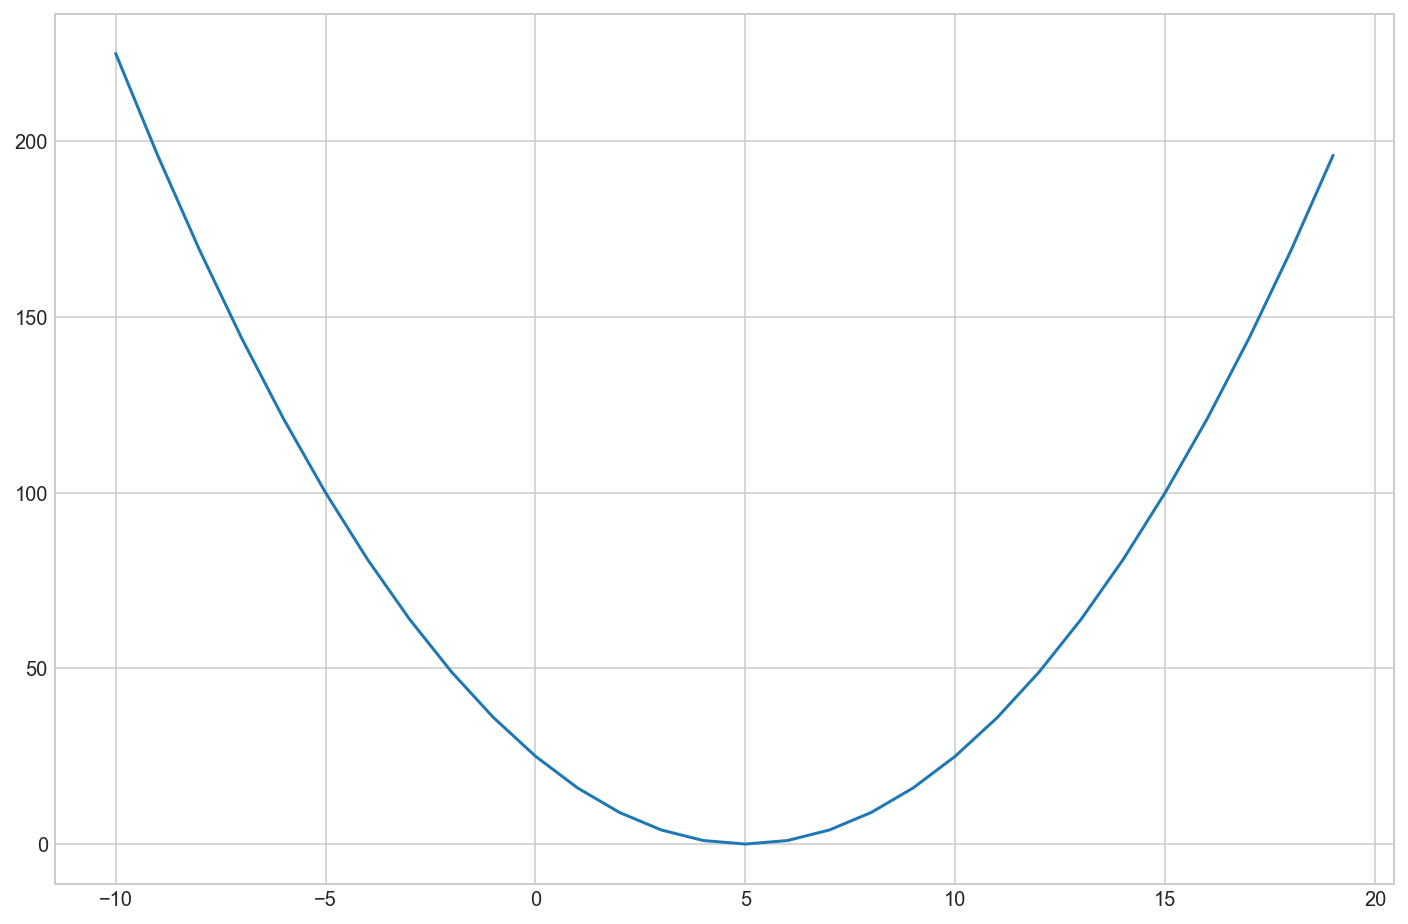

In [5]:
def f(x):
    return (x - 5) ** 2

x = list(range(-10,20))
y = [f(xn) for xn in x]
plt.plot(x,y)
plt.show()

Gradient descent with permanent step

In [6]:
def gradient_descent(f, x_initial, step = 0.01, epsilon = 0.001):
    
    delta = 10
    func_dic = {}
    
    while delta >= epsilon:
        x_next = x_initial - step * derivative(f, x_initial)
        y_k = f(x_next)
        func_dic[x_next] = y_k
        delta = LA.norm(abs(x_next - x_initial))
        x_initial = x_next
    
    return func_dic, x_initial, y_k 

In [7]:
x_prev = 0
dict_1, x_min, y_min = gradient_descent(f, x_prev)

In [8]:
x_min, y_min 

(4.9510512801859345, 0.0023959771714358842)

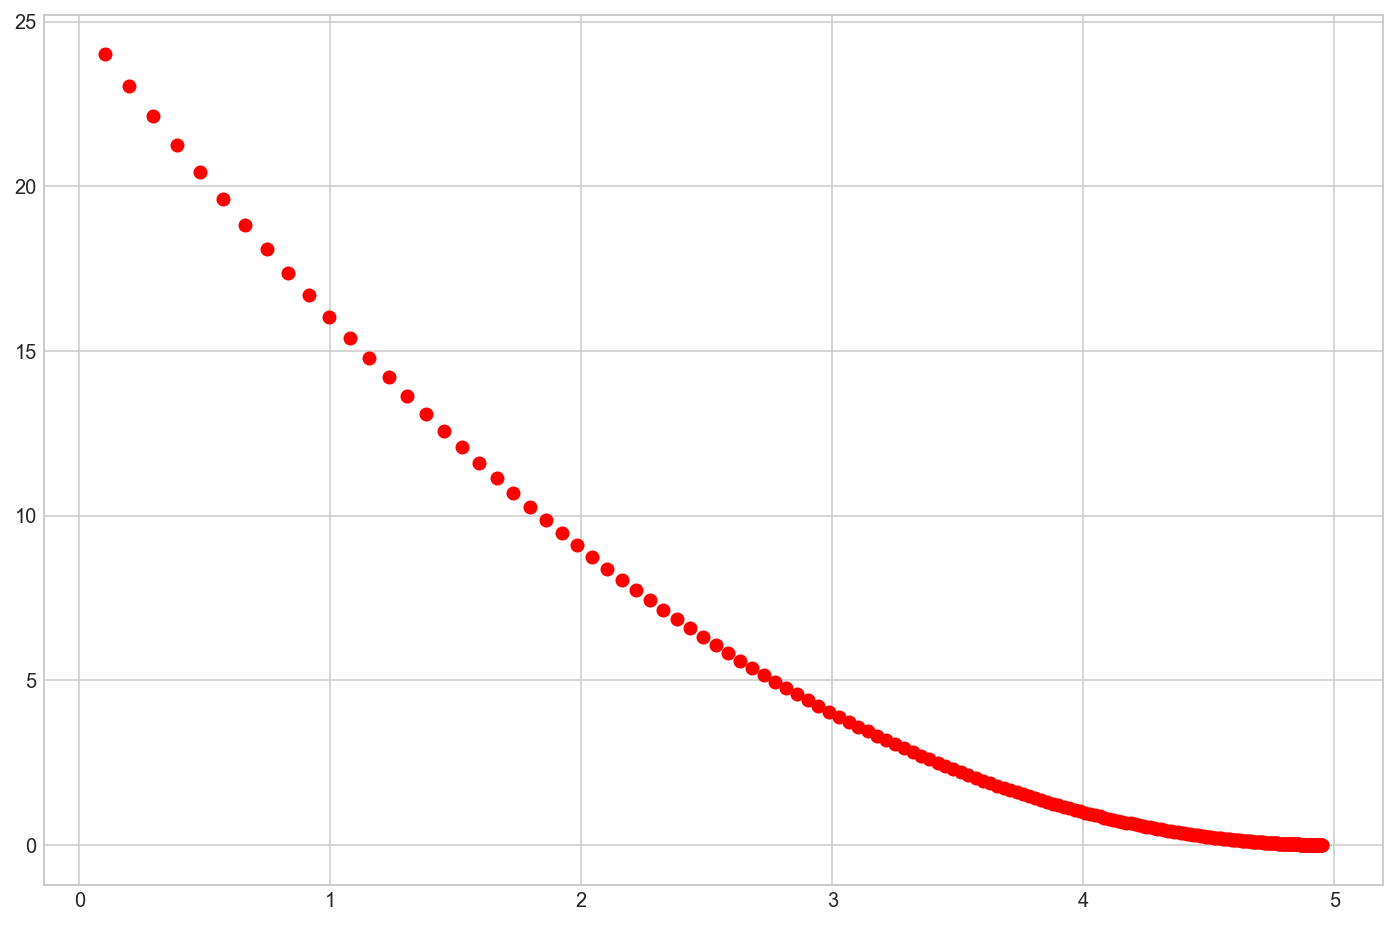

In [9]:
plt.plot(list(dict_1.keys()), list(dict_1.values()), 'ro')
plt.show()

Compare with scipy.optimize package

In [17]:
res = minimize(f, x_prev, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xtol
  """Entry point for launching an IPython kernel.


In [18]:
res.x, f(res.x)

(array([4.99999997]), array([6.47222087e-16]))